<a href="https://colab.research.google.com/github/Nouhaila2002/next-word-prediction-using-LSTM/blob/main/NLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Ce texte est au format code
```

**Next word prediction using LSTM**

**using 3 words to predict next word**

**go to : https://gutenberg.org/files/1342/1342-0.txt  and copy the text in file  Pride and Prejudice.txt **

**Importing required libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pride and Prejudice.txt to Pride and Prejudice.txt


**Load and pre-process the data**

In [ ]:
file = open("Pride and Prejudice.txt","r",encoding="utf8")

#store file in a list
lines = []
for i in file:
    lines.append(i)
    
#convert list to string
data = ""
for i in lines:
    data = ' '.join(lines)
    
#replace unnecessary stuff with space
data = data.replace('\n','').replace('\r','').replace('\ufeff','').replace('"','').replace('"','')

#remove unnecessary space
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using th'

In [ ]:
len(data)

701929

**Apply Tokenization**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

#saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl','wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 176, 160, 947, 3, 335, 4, 1209, 31, 74, 2600, 43, 947, 24, 22]

In [ ]:
len(sequence_data)

127051

In [ ]:
vocab_size = len(tokenizer.word_index)+1
print(vocab_size)

7243


In [ ]:
sequences = []

for i in range(3,len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("the length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]


the length of sequences are:  127048


array([[   1,  176,  160,  947],
       [ 176,  160,  947,    3],
       [ 160,  947,    3,  335],
       [ 947,    3,  335,    4],
       [   3,  335,    4, 1209],
       [ 335,    4, 1209,   31],
       [   4, 1209,   31,   74],
       [1209,   31,   74, 2600],
       [  31,   74, 2600,   43],
       [  74, 2600,   43,  947]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ",X[:10])
print("Response: ",y[:10])

Data:  [[   1  176  160]
 [ 176  160  947]
 [ 160  947    3]
 [ 947    3  335]
 [   3  335    4]
 [ 335    4 1209]
 [   4 1209   31]
 [1209   31   74]
 [  31   74 2600]
 [  74 2600   43]]
Response:  [ 947    3  335    4 1209   31   74 2600   43  947]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Creating the model**

In [19]:
model = Sequential()
model.add(Embedding(vocab_size,10,input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000 ,activation="relu"))
model.add(Dense(vocab_size,activation="softmax"))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3, 10)             72430     
                                                                 
 lstm_4 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_5 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 7243)              7250243   
                                                                 
Total params: 20,371,673
Trainable params: 20,371,673
Non-trainable params: 0
_________________________________________________________________


**Plot the model**

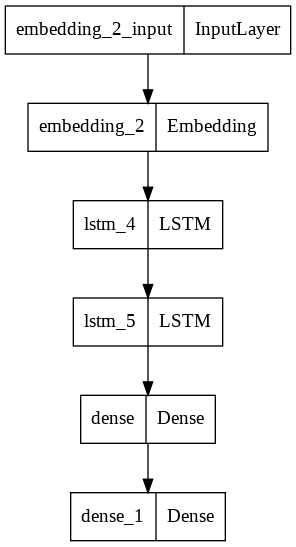

In [21]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png',show_layer_names=True)

**Build our model**


In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X,y,epochs=70,batch_size=64,callbacks=[checkpoint])

Epoch 1/70
1986/1986 [==============================] - ETA: 0s - loss: 6.2686
Epoch 1: loss improved from inf to 6.26859, saving model to next_words.h5
1986/1986 [==============================] - 39s 15ms/step - loss: 6.2686
Epoch 2/70
1986/1986 [==============================] - ETA: 0s - loss: 5.6263
Epoch 2: loss improved from 6.26859 to 5.62630, saving model to next_words.h5
1986/1986 [==============================] - 30s 15ms/step - loss: 5.6263
Epoch 3/70
1983/1986 [============================>.] - ETA: 0s - loss: 5.2623
Epoch 3: loss improved from 5.62630 to 5.26243, saving model to next_words.h5
1986/1986 [==============================] - 30s 15ms/step - loss: 5.2624
Epoch 4/70
1983/1986 [============================>.] - ETA: 0s - loss: 5.0047
Epoch 4: loss improved from 5.26243 to 5.00433, saving model to next_words.h5
1986/1986 [==============================] - 30s 15ms/step - loss: 5.0043
Epoch 5/70
1984/1986 [============================>.] - ETA: 0s - loss: 4.7856
E

**Prediction**

In [23]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

#load the model and tokenizer
model = load_model("next_words.h5")
tokenizer = pickle.load(open("token.pkl","rb"))

def Predict_Next_Words(model, tokenizer, text):
    sequence = tokenizer.texts_to_sequences([text])
    sequence = np.array(sequence)
    preds = np.argmax(model.predict(sequence))
    predicted_word = " "
    
    for key, value in tokenizer.word_index.items():
        if value == preds:
            predicted_word = key
            break
    print(predicted_word)
    return predicted_word

In [25]:

while(True):
    text = input("Enter your line: ")
    
    if text == "0":
        print("Execution completed....")
        break
        
    else:
        try:
            text = text.split(" ")
            text = text[-3:]
            print(text)
            
            Predict_Next_Words(model,tokenizer,text)
        
        except Exception as e:
  
  
            print("Error occurred: ",e)
            continue
            

Enter your line: man of large fortune
['of', 'large', 'fortune']
from
Enter your line: single man of
['single', 'man', 'of']
large
Enter your line: Sir William and
['Sir', 'William', 'and']
lady
Enter your line: 0
Execution completed....
